In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.environ.setdefault('GLUE_SETTINGS_MODULE', 'settings')

'settings'

In [3]:
import netops as gnet
from flowfairy.conf import settings

In [4]:
batch_size = settings.BATCH_SIZE
samplerate = settings.SAMPLERATE

In [5]:
x = tf.placeholder(tf.float32, [1, samplerate])
cls = tf.placeholder(tf.int32, 1)

In [6]:
with tf.variable_scope('network'):
    net = gnet.conv_net(x, cls, None)

conv1 Tensor("network/causal_conv1_1/glu_conv1_1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d1  Tensor("network/glu_conv1_d1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d2  Tensor("network/glu_conv1_d2/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d4  Tensor("network/glu_conv1_d4/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_concat Tensor("network/concat:0", shape=(1, 16384, 1, 12), dtype=float32)
conv2:  Tensor("network/MaxPool2D/MaxPool:0", shape=(1, 8192, 1, 8), dtype=float32)
embedded: Tensor("network/embedding/concat:0", shape=(1, 8192, 1, 10), dtype=float32)
conv3:  Tensor("network/glu_conv3_2/mul:0", shape=(1, 8192, 1, 16), dtype=float32)
d2sp:  Tensor("network/DepthToSpace:0", shape=(1, 32768, 4, 1), dtype=float32)
conv4:  Tensor("network/glu_conv4_2/mul:0", shape=(1, 16384, 1, 16), dtype=float32)
conv5:  Tensor("network/glu_conv5/mul:0", shape=(1, 16384, 1, 256), dtype=float32)
out:  Tensor("network/Reshape_1:0", shape=(1, 16384, 256), dtype=fl

In [7]:
saver = tf.train.Saver()

In [8]:
sess = tf.InteractiveSession()

In [9]:
fname = 'dilated3.checkpoint'
saver.restore(sess, 'logs/dilated3.ckpt-70000')#tf.train.latest_checkpoint('logs', latest_filename=fname))

INFO:tensorflow:Restoring parameters from logs/dilated3.ckpt-70000


In [10]:
coll = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
c1uw = coll[0]

In [11]:
def plot_filter(var, flt):
    plt.plot(var.eval()[:,0,0,flt])

In [12]:
#plot_filter(c1uw, 0)
#plot_filter(c1uw, 1)
#plot_filter(c1uw, 2)
#plot_filter(c1uw, 3)
#plt.show()

In [13]:
for v in enumerate(coll):
    print(v)

(0, <tf.Variable 'network/conv1_1_unit/weights:0' shape=(128, 1, 1, 4) dtype=float32_ref>)
(1, <tf.Variable 'network/conv1_1_unit/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>)
(2, <tf.Variable 'network/conv1_1_gate/weights:0' shape=(128, 1, 1, 4) dtype=float32_ref>)
(3, <tf.Variable 'network/conv1_1_gate/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>)
(4, <tf.Variable 'network/conv1_d1_unit/weights:0' shape=(128, 1, 4, 4) dtype=float32_ref>)
(5, <tf.Variable 'network/conv1_d1_unit/biases:0' shape=(4,) dtype=float32_ref>)
(6, <tf.Variable 'network/conv1_d1_gate/weights:0' shape=(128, 1, 4, 4) dtype=float32_ref>)
(7, <tf.Variable 'network/conv1_d1_gate/biases:0' shape=(4,) dtype=float32_ref>)
(8, <tf.Variable 'network/conv1_d2_unit/weights:0' shape=(128, 1, 4, 4) dtype=float32_ref>)
(9, <tf.Variable 'network/conv1_d2_unit/biases:0' shape=(4,) dtype=float32_ref>)
(10, <tf.Variable 'network/conv1_d2_gate/weights:0' shape=(128, 1, 4, 4) dtype=float32_ref>)
(11, <tf.Variable 'network/con

(200, 2)


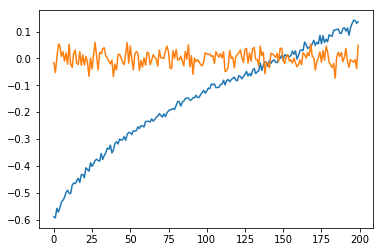

[-0.27644473  0.04646694]
[-0.22507937 -0.00728783]


In [14]:
embedding = coll[24]
#print(embedding)
emb = embedding.eval()
print(emb.shape)
plt.plot(emb)
plt.savefig('embedding.eps', format='eps', dpi=1000)
plt.show()

print(embedding.eval()[50])
print(embedding.eval()[64])

In [15]:
def classify(val):
    val = (val-np.min(val))/(np.max(val)-np.min(val))
    return np.floor(val*255)

def getid(frq):
    limits = settings.FREQUENCY_LIMIT
    count = settings.CLASS_COUNT
    step = (limits[1] - limits[0]) // count
    return (frq-limits[0])//step

def getfrq(fid):
    limits = settings.FREQUENCY_LIMIT
    count = settings.CLASS_COUNT
    step = (limits[1] - limits[0]) // count
    return limits[0] + step*fid

In [16]:
with tf.variable_scope('network', reuse=True):
    tnet = gnet.conv_net(x, cls, None, is_training=True)

conv1 Tensor("network_1/causal_conv1_1/glu_conv1_1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d1  Tensor("network_1/glu_conv1_d1/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d2  Tensor("network_1/glu_conv1_d2/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_d4  Tensor("network_1/glu_conv1_d4/mul:0", shape=(1, 16384, 1, 4), dtype=float32)
conv1_concat Tensor("network_1/concat:0", shape=(1, 16384, 1, 12), dtype=float32)
conv2:  Tensor("network_1/MaxPool2D/MaxPool:0", shape=(1, 8192, 1, 8), dtype=float32)
embedded: Tensor("network_1/embedding/concat:0", shape=(1, 8192, 1, 10), dtype=float32)
conv3:  Tensor("network_1/glu_conv3_2/mul:0", shape=(1, 8192, 1, 16), dtype=float32)
d2sp:  Tensor("network_1/DepthToSpace:0", shape=(1, 32768, 4, 1), dtype=float32)
conv4:  Tensor("network_1/glu_conv4_2/mul:0", shape=(1, 16384, 1, 16), dtype=float32)
conv5:  Tensor("network_1/glu_conv5/mul:0", shape=(1, 16384, 1, 256), dtype=float32)
out:  Tensor("network_1/Reshape_1:0", shape=(

In [17]:
pred = tf.argmax(net, 2)


In [18]:
tpred = tf.argmax(tnet, 2)

In [27]:
frqid = 98
frq = getfrq(frqid)
print(frq)

bfrq = getfrq(195)
print(bfrq)

amp = np.random.rand(2) * 3 + 1
print(amp)

myrange = np.arange(samplerate) * 2 * np.pi / samplerate
mysine = np.sin(myrange * frq * amp[0])
mysine2 = np.sin(myrange * bfrq * amp[1])
noise = np.random.uniform(-0.5, 0.5, samplerate)

#plt.plot(mysine)
#plt.show()

396
590
[ 3.3064562   2.54879803]


In [28]:
b = np.array([mysine+mysine2+noise])
y = np.array([frqid])
#b=np.tile(classify(mysine+mysine2),(64,1))
#y=np.arange(136,200)
run = sess.run(pred, feed_dict={x: b, cls: y})

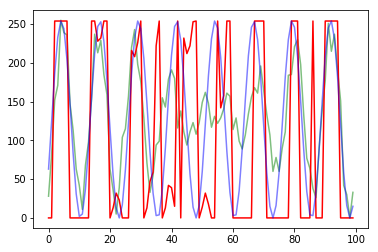

In [29]:
plt.plot(classify(b[0][1000:1100]), 'g', alpha=0.5)
plt.plot(run[0][1000:1100], 'r')
plt.plot(classify(mysine)[1000:1100], 'b', alpha=0.5)
#plt.plot(classify(mysine2)[1000:1100], 'g', alpha=0.5)
plt.show()

In [22]:
print(tf.train.Saver.last_checkpoints)
print(saver.last_checkpoints)
l = tf.train.latest_checkpoint('logs', latest_filename='GGLU_e2_256.checkpoint')
step = l[l.rfind('-')+1:]
print(step)

[]
130000


In [23]:
unc = np.random.rand(2,20,4)
unc = np.amax(unc, axis=2)
print(unc[0])

[ 0.91878184  0.64370621  0.94063747  0.77721371  0.9274338   0.79686868
  0.80925457  0.77344995  0.91798034  0.84063423  0.90289086  0.83633375
  0.61696393  0.97645601  0.82670393  0.96406919  0.50626325  0.85536138
  0.86862131  0.95202167]
